In [ ]:
# importing the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [12]:
# reading the CSV raw data thorugh pandas
df_dest = pd.read_csv(r'C:\Users\naman\Downloads\DMDDA3\DMDDA3\Top Destinations\Input_US_Destinations.csv')
df_dest.head(2)

,destination,rating,rank,description,tourist_attractions_count,best_time_to_go
0,1. New York City,4.8/5,1 out of 100 Places to visit in United States...,An iconic global centre that has inspired the ...,275 Tourist attractions,Throughout the year
1,2. Las Vegas,4.0/5,2 out of 100 Places to visit in United States...,Las Vegas - a place that brings neon signboard...,117 Tourist attractions,September to November (Autumn)


In [14]:
# data cleaning for tourist attractions
df_dest['destination'] = df_dest.apply(lambda row: row['destination'].split('.')[1],axis=1)
df_dest['rating'] = df_dest.apply(lambda row: row['rating'].split('/')[0],axis=1)
df_dest['rank'] = df_dest.apply(lambda row: row['rank'].split(' ')[0],axis=1)
df_dest['tourist_attractions_count'] = df_dest.apply(lambda row: row['tourist_attractions_count'].split(' ')[0],axis=1)
df_dest['rating'] = df_dest['rating'].replace('Not known', 0)
df_dest['best_time_to_go'] = df_dest['best_time_to_go'].replace('Not known','Best time not available')

In [16]:
# getting datatypes for each column
df_dest.dtypes

destination                  object
rating                       object
rank                         object
description                  object
tourist_attractions_count    object
best_time_to_go              object
dtype: object

In [17]:
# dictionary for data type modifications
dict_dtype = {
    'destination':str,
    'rating':float,
    'rank':int,
    'description':str,
    'tourist_attractions_count':int,
    'best_time_to_go':str,
}
# iterating the dictionary keys to change datatypes as per the required format
for key in dict_dtype.keys():
    df_dest[key] = df_dest[key].astype(dict_dtype[key])

In [18]:
# verifying datatypes for each column after transformation
df_dest.dtypes

destination                   object
rating                       float64
rank                           int32
description                   object
tourist_attractions_count      int32
best_time_to_go               object
dtype: object

In [67]:
# describe the data to understand the distriution
df_dest.describe()

,rating,rank,tourist_attractions_count
count,100.000000,100.000000,100.000000
mean,3.253000,50.500000,78.480000
std,1.008094,29.011492,57.882584
min,0.000000,1.000000,9.000000
25%,2.500000,25.750000,43.750000
50%,3.450000,50.500000,66.500000
75%,4.000000,75.250000,89.250000
max,5.000000,100.000000,282.000000


In [68]:
# checking nulls in data
df_dest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   destination                100 non-null    object 
 1   rating                     100 non-null    float64
 2   rank                       100 non-null    int32  
 3   description                100 non-null    object 
 4   tourist_attractions_count  100 non-null    int32  
 5   best_time_to_go            100 non-null    object 
dtypes: float64(1), int32(2), object(3)
memory usage: 4.0+ KB


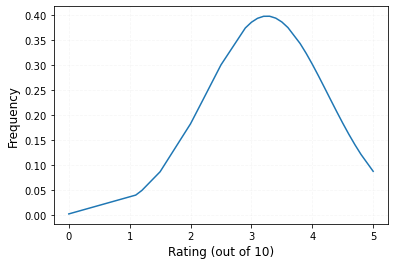

In [22]:
# Distribution plot
# mean review count from dataframe
mu = np.mean(df_dest["rating"])
# standard deviation review count from dataframe
sigma = np.std(df_dest["rating"])
# numpy random normalizing
s = np.random.normal(mu, sigma, 1000)
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_dest["rating"].sort_values(), mu, sigma)
# Drawing a graph
plt.plot(df_dest["rating"].sort_values(), pdf)
plt.xlabel("Rating (out of 10)", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.1, linestyle="--")
# show plots
plt.show()

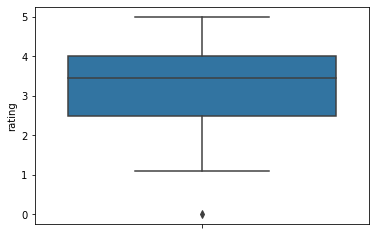

In [69]:
# box plot for rating in data
sns.boxplot(y="rating", data=df_dest);

Text(0.5, 0, 'Destinations')

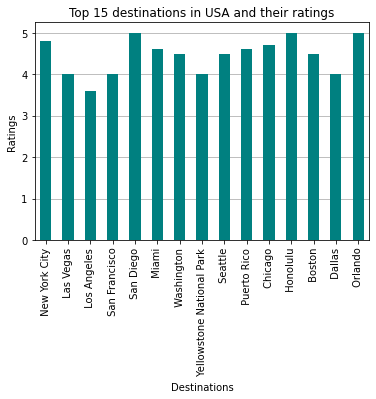

In [70]:
# top 15 destinations based on rank
top_destinations=df_dest.sort_values(by=['rank'], ascending=True).iloc[:15,:]
city_bar = top_destinations.plot.bar(x="destination", y="rating", rot=90, legend=None, color="teal", zorder=3)
# formatting the graph plot
plt.grid(which="major", axis="y", zorder=0)
plt.xticks(rotation=90)
plt.title("Top 15 destinations in USA and their ratings")
plt.ylabel("Ratings")
plt.xlabel("Destinations")

In [71]:
# writing the output file
df_dest.to_csv(r'C:\Users\naman\PycharmProjects\DMDDA3\Output_US_Destinations.csv',index=False)